 1. Прочитайте базу "Потребление Энергии" (или BRENT(сделать анализ пропусков и больше чем 2-х дневные заполнить, и работаем для 3-х дневного ресемплинга), или COVID-19(выбрать любую страну кроме Бразилии)) и сделайте модель основных изменений по data_exp_1(сглаженной) с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
data.tail()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2018-08-02,20:00:00,44057.0,2018,8,2,3,214,31,3,20,0,0,0
2018-08-02,21:00:00,43256.0,2018,8,2,3,214,31,3,21,0,0,0
2018-08-02,22:00:00,41552.0,2018,8,2,3,214,31,3,22,0,0,0
2018-08-02,23:00:00,38500.0,2018,8,2,3,214,31,3,23,0,0,0
2018-08-03,00:00:00,35486.0,2018,8,3,3,215,31,4,0,0,0,0


In [4]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [5]:
d_data=data.resample('D').mean()
d_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-01,31080.739130,2002.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,1.0,0.0,0.0
2002-01-02,34261.541667,2002.0,1.0,2.0,1.0,2.0,1.0,2.0,11.5,0.0,0.0,1.0
2002-01-03,34511.875000,2002.0,1.0,3.0,1.0,3.0,1.0,3.0,11.5,0.0,0.0,0.0
2002-01-04,33715.458333,2002.0,1.0,4.0,1.0,4.0,1.0,4.0,11.5,0.0,0.0,0.0
2002-01-05,30405.125000,2002.0,1.0,5.0,1.0,5.0,1.0,5.0,11.5,0.0,0.0,0.0


Text(0.5, 1.0, 'PJME_MW')

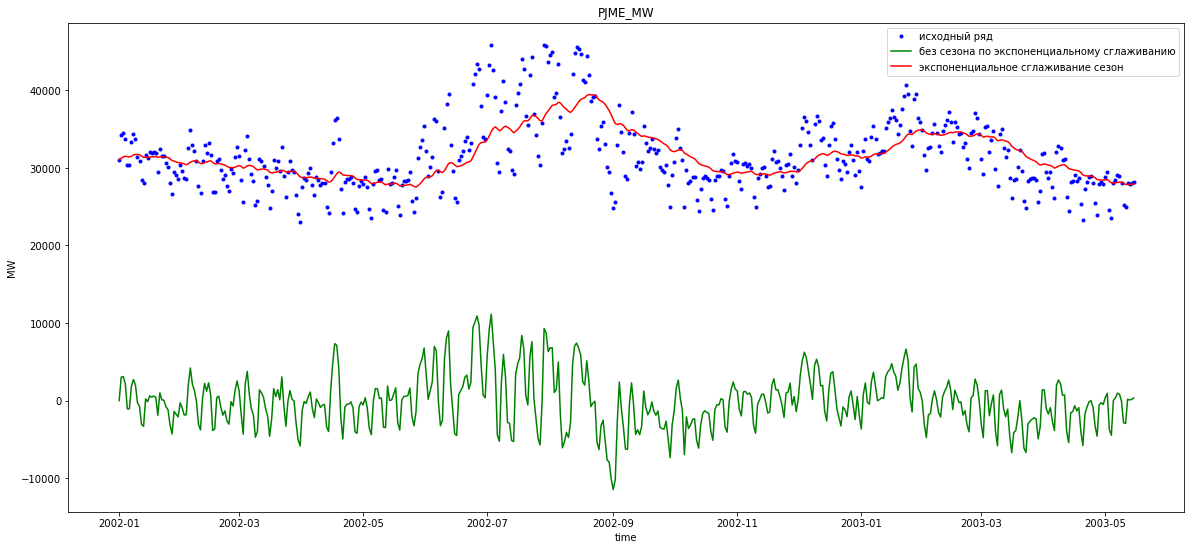

In [6]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW']  , 0.05)
plt.figure(figsize=(20, 9))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], '.b',label='исходный ряд')

plt.plot(d_data.index[:500],d_data['PJME_MW'].values[:500] - data_exp_1[:500] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(d_data.index[:500],data_exp_1[:500] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW')

In [7]:
data_seson_free = pd.DataFrame(data = (np.array(d_data['PJME_MW']).reshape((d_data['PJME_MW'].shape[0],1)) -data_exp_1))
DF_ = sm.tsa.stattools.adfuller( data_seson_free.iloc[:,0] , regression = 'ctt')
DF_

(-8.365362138566837,
 4.282974615277591e-11,
 34,
 6024,
 {'1%': -4.373054660566805,
  '5%': -3.833370706612336,
  '10%': -3.55386764946938},
 107622.59914749119)

In [8]:
data_exp_1 = pd.DataFrame(data = data_exp_1, index = d_data.index)
df= pd.DataFrame(data_exp_1)
 # добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0.0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0.0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0.0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0.0
df['diff1'].iloc[1:] = df.iloc[:-1,0].values-df.iloc[1:,0].values


df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.000000
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31082.329532,31085.510334,31093.462341,-159.040127
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31085.540077,31095.046546,31118.256077,-163.604787
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31089.874554,31107.764782,31150.314611,-115.603714
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31093.608754,31118.430677,31175.353012,55.693138


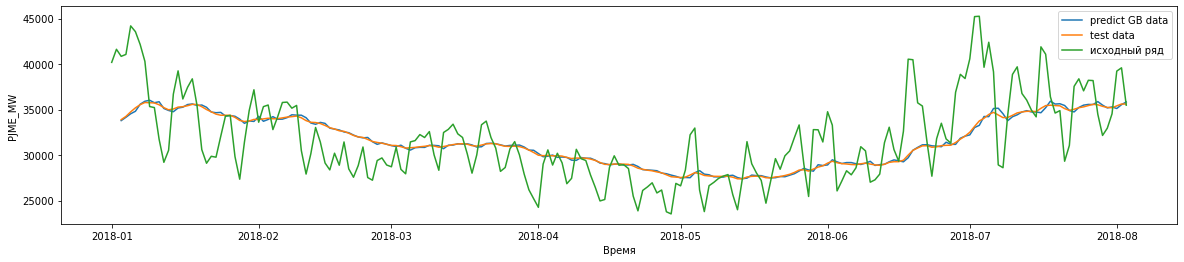

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_p, test_p = split_data( df, '01-01-2018')

h=1
X_train_p1 = train_p.iloc[:-h,:]
y_train_p1 = train_p[df.columns[0]].values[h:]
X_test_p1 = test_p.iloc[:-h,:]
y_test_p1 = test_p[df.columns[0]].values[h:]

model_gb.fit( X_train_p1, y_train_p1 ) 
X_test_pred_gb1 = model_gb.predict(X_test_p1)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('PJME_MW')
plt.plot(test_p.index[h:],X_test_pred_gb1, label='predict GB data' )
plt.plot(test_p.index[h:],y_test_p1, label='test data')
plt.plot(d_data.loc['2018-01-01':].index, d_data.loc['2018-01-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

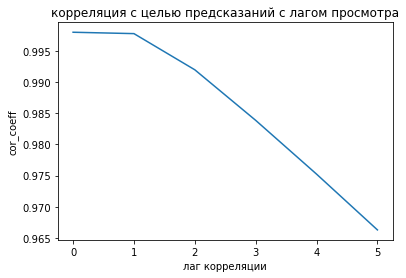

In [10]:
lag=5
p_cor1=[np.corrcoef( y_test_p1, X_test_pred_gb1)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_p1[:-(i+1)], X_test_pred_gb1[(i+1):])[1,0]
    p_cor1.append(c)    

plt.plot(np.array(p_cor1) ) 
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

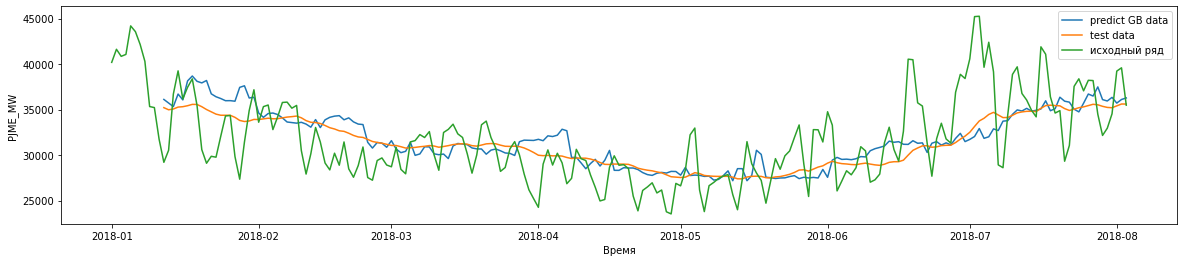

In [11]:
h=10
X_train_p10 = train_p.iloc[:-h,:]
y_train_p10 = train_p[df.columns[0]].values[h:]
X_test_p10 = test_p.iloc[:-h,:]
y_test_p10 = test_p[df.columns[0]].values[h:]

model_gb.fit( X_train_p10, y_train_p10 ) 
X_test_pred_gb10 = model_gb.predict(X_test_p10)

plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('PJME_MW')
plt.plot(test_p.index[h:],X_test_pred_gb10, label='predict GB data' )
plt.plot(test_p.index[h:],y_test_p10, label='test data')
plt.plot(d_data.loc['2018-01-01':].index, d_data.loc['2018-01-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

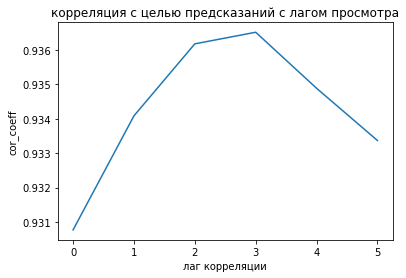

In [12]:
lag=5
p_cor10=[np.corrcoef( y_test_p10, X_test_pred_gb10)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test_p10[:-(i+1)], X_test_pred_gb10[(i+1):])[1,0]
    p_cor10.append(c)    

plt.plot(np.array(p_cor10) ) 
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

 2. Оцените ошибку модели из п.1 .

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [55]:
er_g1 = mean_absolute_percentage_error(y_true=y_test_p1, y_pred=X_test_pred_gb1)

print('ошибка градиентного бустинга при h=1:  ', er_g1, '%')

ошибка градиентного бустинга при h=1:   0.4147658760036105 %


In [56]:
er_g10 = mean_absolute_percentage_error(y_true=y_test_p10, y_pred=X_test_pred_gb10)

print('ошибка градиентного бустинга при h=10:  ', er_g10, '%')

ошибка градиентного бустинга при h=10:   2.7786632133305464 %


 3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [ ]:
# Видим, что при h=10 значение ошибки выросло в 6,7 раза по сравнению с h=1, 
# то есть, чем дальше горизонт прогноза, тем ниже точность предсказания

 4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :) - зависит от промежутка времени измерения: например, в течение нескольких часов - нестационарный с трендом, за неделю поведение может быть близким к стационарному, за год будет сезонность, за несколько лет - сезоны и циклы. 

б) Количество денег, которые тратят покупатели в интернет магазине - тоже зависит от временного отрезка и состава товаров (у большинства будет сезонность, но есть группы товаров постоянного спроса). На небольших промежутках времени поведение может быт  близким к стационарному (ночью тратят меньше, днем больше), на длинных, как правило, ряд нестационарный с трендом, недельными и годовыми циклами.

в) Вес растущего котенка - опять же, если не совсем короткий промежуток времени, тогда нестационарный, с трендом.

г) Прирост объема деревьев в лесу от времени - нестационарный, с трендом и сезоном, если предполагается только прирост, а если длительное время и предположить вырубку - также с циклами.